# Logistic Regression Assignment
Implement the Logistic Regression learning by gradient ascent as described in class.
Before using logistic regression, be sure to normalize the variables of the training set
to have zero mean and standard deviation 1, and to do the exact same transformation to
the test set, using the mean and standard deviation of the training set

#### Import dependencies

In [1]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from matplotlib import pyplot as plt

#### Data loading functions

In [2]:
def get_gisette():
    path = "data/gisette/"   
    
    train_x = np.loadtxt(path+"gisette_train.data")
    train_y = np.loadtxt(path+"gisette_train.labels")
    
    valid_x = np.loadtxt(path+"gisette_valid.data")
    valid_y = np.loadtxt(path+"gisette_valid.labels")
    
    test_x = np.loadtxt(path+"gisette_test.data")

    return train_x, train_y, valid_x, valid_y, test_x


def get_hill_valley():
    path = "data/hill-valley/"   
    
    train_x = np.loadtxt(path+"X.dat")
    train_y = np.loadtxt(path+"Y.dat")
    
    test_x = np.loadtxt(path+"Xtest.dat")
    test_y = np.loadtxt(path+"Ytest.dat")
    
    return train_x, train_y, test_x, test_y


def get_dexter():
    path = "data/dexter/"

    train_x = np.loadtxt(path+"dexter_train.csv", delimiter=',')
    train_y = np.loadtxt(path+"dexter_train.labels")

    valid_x = np.loadtxt(path+"dexter_valid.csv", delimiter=',')
    valid_y = np.loadtxt(path+"dexter_valid.labels")

    return train_x, train_y, valid_x, valid_y

#### Normalization function

In [3]:
def normalize(train, *args):
    print(train)
    mean = np.average(train, axis=0)
    standard_deviation = np.std(train, axis=0)
    columns = train, *args
    return tuple(np.divide(column-mean, standard_deviation, where=standard_deviation!=0)
                 for column in columns)

## Logistic regression
Solved  Analytically

In [ ]:
def logistic_regression(x, train_y, test_x, test_y, learning_rate):
    x = np.hstack((np.ones((x.shape[0], 1)), x))
    test_x = np.hstack((np.ones((test_x.shape[0], 1)), test_x))
    iterations = 300
    lmb = 0.0001

    w = np.zeros(x.shape[1])
    scores = []
    scores_test = []

    predicted_y = np.round(predict(x, w))
    scores.append(log_loss(train_y, predicted_y))
    predicted_y = np.round(predict(test_x, w))
    scores_test.append(log_loss(test_y, predicted_y))

    for _ in range(iterations):
        w = w - lmb * learning_rate * w - learning_rate / x.shape[0] * L(w, x, train_y)
        predicted_y = np.round(predict(x, w))
        scores.append(log_loss(train_y, predicted_y))
        predicted_y = np.round(predict(test_x, w))
        scores_test.append(log_loss(test_y, predicted_y))

        predicted_y = np.round(predict(x, w))
        error_train = 1 - accuracy_score(train_y, predicted_y)
        predicted_y = np.round(predict(test_x, w))
        error_test = 1 - accuracy_score(test_y, predicted_y)
    print("Negative log-likelihood vs iteration")
    print("Blue: training, Orange: Testing")
    plt.plot(range(iterations + 1), scores)
    plt.plot(range(iterations + 1), scores_test)
    plt.table(cellText=[[error_train], [error_test]], rowLabels=['Training error', 'Test error'], bbox=[0.3,-0.6, .4,.3], edges="closed" )
    plt.show()

    return scores_test[-1]


def predict(x, w):
    y = 1/(1 + np.exp(-(x.dot(w))))
    return y


def L(w, x, y):
    '''
    Gradient of negative logistic loss function, simplified in accordance with the following derivation.
    source: https://stats.stackexchange.com/questions/261692/gradient-descent-for-logistic-regression-partial-derivative-doubt'''
    return (predict(x, w) - y) @ x

def find_learning_rate(train_x, train_y, test_x, test_y, rates_to_try):
    """ Function for testing various learning rates"""
    return [[rate, logistic_regression(train_x, train_y, test_x, test_y, rate)] for rate in rates_to_try]#logistic_regression(train_x, train_y, valid_x, valid_y)

## 1(a) Gisette


#### Load Data

In [ ]:
train_x, train_y, valid_x, valid_y, test_x = get_gisette()
train_x, valid_x, test_x = normalize(train_x, valid_x, test_x)
train_y[train_y==-1] = 0
valid_y[valid_y==-1] = 0

#### Train logistic regression model

In [ ]:
learning_rate = .01
logistic_regression(train_x, train_y, valid_x, valid_y, learning_rate)
#find_learning_rate(train_x, train_y, valid_x, valid_y, [.1, .05, .02, .01, .05, .01, .005, .001])

## 1(b) Hill Valley

#### Load Data

In [ ]:
train_x, train_y, test_x, test_y = get_hill_valley()
train_x, test_x = normalize(train_x, test_x)

#### Train logistic regression model

In [ ]:
learning_rate = .05
logistic_regression(train_x, train_y, test_x, test_y, learning_rate)
#find_learning_rate(train_x, train_y, test_x, test_y, [.1, .05, .02, .01, .05, .01, .005, .001])

## 1(c) Dexter

#### Load Data

In [ ]:
train_x, train_y, valid_x, valid_y = get_dexter()

In [ ]:
train_x, valid_x = normalize(train_x, valid_x)
train_y[train_y==-1] = 0
valid_y[valid_y==-1] = 0

#### Train logistic regression model

In [ ]:
learning_rate = .001
logistic_regression(train_x, train_y, valid_x, valid_y, learning_rate)

learning_rate = .001
logistic_regression(train_x, train_y, valid_x, valid_y, learning_rate)

In [4]:
def logistic_regression(x, train_y, test_x, test_y, learning_rate):
    x = np.hstack((np.ones((x.shape[0], 1)), x))
    test_x = np.hstack((np.ones((test_x.shape[0], 1)), test_x))
    iterations = 300
    lmb = 0.0001

    w = np.zeros(x.shape[1])
    scores = []
    scores_test = []

    predicted_y = np.round(predict(x, w))
    scores.append(log_loss(train_y, predicted_y))
    predicted_y = np.round(predict(test_x, w))
    scores_test.append(log_loss(test_y, predicted_y))

    for _ in range(iterations):
        w = w - lmb * learning_rate * w - learning_rate / x.shape[0] * L(w, x, train_y)
        predicted_y = np.round(predict(x, w))
        scores.append(log_loss(train_y, predicted_y))
        predicted_y = np.round(predict(test_x, w))
        scores_test.append(log_loss(test_y, predicted_y))

        predicted_y = np.round(predict(x, w))
        error_train = 1 - accuracy_score(train_y, predicted_y)
        predicted_y = np.round(predict(test_x, w))
        error_test = 1 - accuracy_score(test_y, predicted_y)
    print("Negative log-likelihood vs iteration")
    print("Blue: training, Orange: Testing")
    plt.plot(range(iterations + 1), scores)
    plt.plot(range(iterations + 1), scores_test)
    plt.table(cellText=[[error_train], [error_test]], rowLabels=['Training error', 'Test error'], bbox=[0.3,-0.6, .4,.3], edges="closed" )
    plt.show()

    return scores_test[-1]


def predict(x, w):
    y = 1/(1 + np.exp(-(x.dot(w))))
    return y


def L(w, x, y):
    '''
    Gradient of negative logistic loss function, simplified in accordance with the following derivation.
    source: https://stats.stackexchange.com/questions/261692/gradient-descent-for-logistic-regression-partial-derivative-doubt'''
    return (predict(x, w) - y) @ x

def find_learning_rate(train_x, train_y, test_x, test_y, rates_to_try):
    """ Function for testing various learning rates"""
    return [[rate, logistic_regression(train_x, train_y, test_x, test_y, rate)] for rate in rates_to_try]#logistic_regression(train_x, train_y, valid_x, valid_y)

## 1(a) Gisette


#### Load Data

In [5]:
train_x, train_y, valid_x, valid_y, test_x = get_gisette()
train_x, valid_x, test_x = normalize(train_x, valid_x, test_x)
train_y[train_y==-1] = 0
valid_y[valid_y==-1] = 0

[[550.   0. 495. ...   0.   0. 983.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0. 991. ...   0.   0. 991.]]


#### Train logistic regression model

Negative log-likelihood vs iteration
Blue: training, Orange: Testing


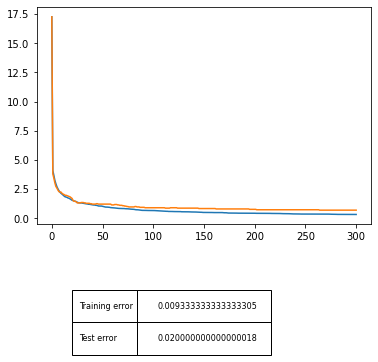

0.6907835238725164

In [6]:
learning_rate = .01
logistic_regression(train_x, train_y, valid_x, valid_y, learning_rate)
#find_learning_rate(train_x, train_y, valid_x, valid_y, [.1, .05, .02, .01, .05, .01, .005, .001])

## 1(b) Hill Valley

#### Load Data

In [7]:
train_x, train_y, test_x, test_y = get_hill_valley()
train_x, test_x = normalize(train_x, test_x)

[[3.902000e+01 3.649000e+01 3.820000e+01 ... 3.946000e+01 3.750000e+01
  3.910000e+01]
 [1.830000e+00 1.710000e+00 1.770000e+00 ... 1.780000e+00 1.750000e+00
  1.690000e+00]
 [6.817769e+04 6.613842e+04 7.298188e+04 ... 7.106372e+04 6.740427e+04
  7.492024e+04]
 ...
 [5.310000e+00 5.030000e+00 5.170000e+00 ... 5.140000e+00 5.120000e+00
  5.040000e+00]
 [1.030000e+00 1.020000e+00 1.090000e+00 ... 1.100000e+00 1.110000e+00
  1.070000e+00]
 [6.177000e+01 5.863000e+01 6.306000e+01 ... 6.513000e+01 5.974000e+01
  6.386000e+01]]


#### Train logistic regression model

Negative log-likelihood vs iteration
Blue: training, Orange: Testing


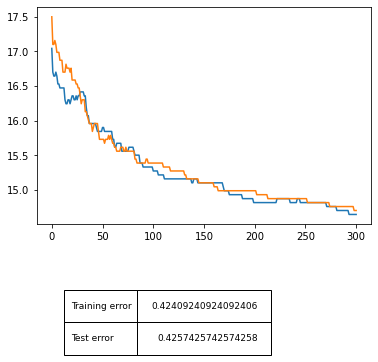

14.704642088215659

In [8]:
learning_rate = .05
logistic_regression(train_x, train_y, test_x, test_y, learning_rate)
#find_learning_rate(train_x, train_y, test_x, test_y, [.1, .05, .02, .01, .05, .01, .005, .001])

## 1(c) Dexter

#### Load Data

In [9]:
train_x, train_y, valid_x, valid_y = get_dexter()

In [10]:
train_x, valid_x = normalize(train_x, valid_x)
train_y[train_y==-1] = 0
valid_y[valid_y==-1] = 0

[[ 0.  0.  0. ...  0.  0. 56.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


#### Train logistic regression model

Negative log-likelihood vs iteration
Blue: training, Orange: Testing


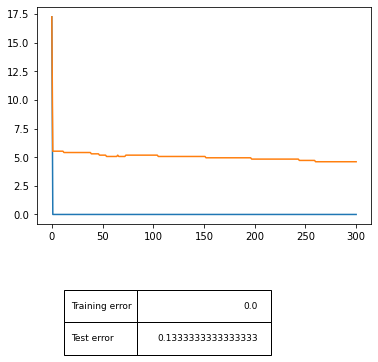

4.605242149756809

In [11]:
learning_rate = .001
logistic_regression(train_x, train_y, valid_x, valid_y, learning_rate)